In [91]:
import matplotlib.pyplot as plt
import pandas as pd


In [92]:
pard97=pd.read_csv('data/faktPardavimai1997.csv', sep=";", parse_dates=['pardavimo_data'])
pard98=pd.read_csv('data/faktPardavimai1998.csv', sep=";", parse_dates=['pardavimo_data'])
pard99=pd.read_csv('data/faktPardavimai1999.csv', sep=";", parse_dates=['pardavimo_data'])

In [93]:
pard=pd.concat([pard97,pard98, pard99], axis=0)
pard

,pardavimo_data,nupirkimo_data,prekes_id,kliento_id,parduotuves_id,kiekis,Parduotas_kiekis
0,1997-01-01,1996-12-31,869,3449,6,5.0,NaN
1,1997-01-01,1996-12-31,1472,3449,6,3.0,NaN
2,1997-01-01,1996-12-28,76,3449,6,4.0,NaN
3,1997-01-01,1996-12-26,320,3449,6,3.0,NaN
4,1997-01-01,1996-12-25,4,3449,6,4.0,NaN
...,...,...,...,...,...,...,...
1557,1999-01-04,1999-01-03,797,9366,17,NaN,3.0
1558,1999-01-04,1998-12-29,799,1352,17,NaN,3.0
1559,1999-01-04,1999-01-01,802,7448,8,NaN,4.0
1560,1999-01-04,1998-12-28,804,216,17,NaN,3.0


In [94]:
pard99=pard99.rename(
    columns=
    {
    'Parduotas_kiekis':'kiekis'
    }
    )
pard99.columns

Index(['pardavimo_data', 'nupirkimo_data', 'prekes_id', 'kliento_id',
       'parduotuves_id', 'kiekis'],
      dtype='object')

In [95]:
df_pardavimai=pd.concat([pard97,pard98, pard99], axis=0)
df_pardavimai.shape

(271282, 6)

In [96]:
df_klientai=pd.read_csv('data/dimKlientai.csv', sep=";")
df_klientai.head()

,kliento_id,kliento_sask_nr,vardas,pavarde,kliento_adresas,kliento_miestas,kliento_provincija,kliento_pasto_kodas,kliento_salis,gimimo_data,seimynine_padetis,metines_pajamos,lytis,vaiku_skaicius,vaiku_skaicius_namuose,issilavinimas,kliento_registracijos_data,kliento_kortele,uzsiemimas,namu_savininkas
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,1961-08-26,M,$30K - $50K,F,4,2,Partial High School,1991-09-10,Bronze,Skilled Manual,Y
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,1915-07-03,S,$70K - $90K,M,1,0,Partial High School,1993-03-11,Bronze,Professional,N
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,M,$50K - $70K,F,1,1,Bachelors Degree,1991-06-11,Bronze,Professional,Y
3,4,87500482201,Michael,Spence,337 Tosca Way,Burnaby,BC,74674,Canada,1969-06-20,M,$10K - $30K,M,4,4,Partial High School,1994-05-21,Normal,Skilled Manual,N
4,5,87514054179,Maya,Gutierrez,8668 Via Neruda,Novato,CA,57355,USA,1951-05-10,S,$30K - $50K,F,3,0,Partial College,1992-08-21,Silver,Manual,N


In [97]:
df_klientai_padavimai=pd.merge(df_klientai,df_pardavimai, 
                               how="left", on="kliento_id")
df_klientai_padavimai.head()


,kliento_id,kliento_sask_nr,vardas,pavarde,kliento_adresas,kliento_miestas,kliento_provincija,kliento_pasto_kodas,kliento_salis,gimimo_data,...,issilavinimas,kliento_registracijos_data,kliento_kortele,uzsiemimas,namu_savininkas,pardavimo_data,nupirkimo_data,prekes_id,parduotuves_id,kiekis
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,1961-08-26,...,Partial High School,1991-09-10,Bronze,Skilled Manual,Y,NaT,NaN,NaN,NaN,NaN
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,1915-07-03,...,Partial High School,1993-03-11,Bronze,Professional,N,NaT,NaN,NaN,NaN,NaN
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,Bachelors Degree,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-23,1318.0,15.0,3.0
3,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,Bachelors Degree,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-22,1534.0,15.0,2.0
4,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,Bachelors Degree,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-21,885.0,15.0,2.0


In [98]:
df_klientai_padavimai['parduotuves_id']=df_klientai_padavimai['parduotuves_id'].fillna(0)

df_klientai_padavimai['parduotuves_id']=df_klientai_padavimai['parduotuves_id'].astype(int)


array([<Axes: ylabel='kiekis'>], dtype=object)

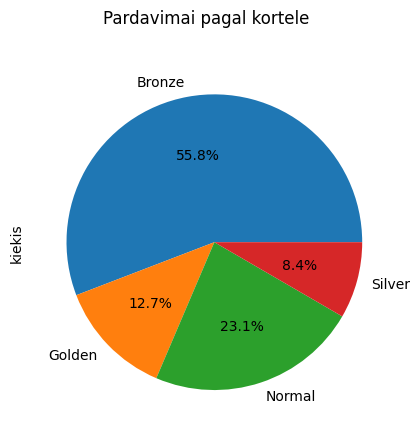

In [99]:
df_klientai_padavimai[['kliento_kortele','kiekis']].groupby('kliento_kortele').sum().plot.pie(subplots=True, 
                                                                                              title='Pardavimai pagal kortele', autopct='%1.1f%%',
                                                                                             legend=False)

In [101]:
df_klientai_padavimai['Metai'] = df_klientai_padavimai['pardavimo_data'].dt.year
df_klientai_padavimai['Metai']=df_klientai_padavimai['Metai'].fillna(0).astype(int)

In [102]:
df_klientai_padavimai.head()

,kliento_id,kliento_sask_nr,vardas,pavarde,kliento_adresas,kliento_miestas,kliento_provincija,kliento_pasto_kodas,kliento_salis,gimimo_data,...,kliento_registracijos_data,kliento_kortele,uzsiemimas,namu_savininkas,pardavimo_data,nupirkimo_data,prekes_id,parduotuves_id,kiekis,Metai
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,1961-08-26,...,1991-09-10,Bronze,Skilled Manual,Y,NaT,NaN,NaN,0,NaN,0
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,1915-07-03,...,1993-03-11,Bronze,Professional,N,NaT,NaN,NaN,0,NaN,0
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-23,1318.0,15,3.0,1997
3,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-22,1534.0,15,2.0,1997
4,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,1910-06-21,...,1991-06-11,Bronze,Professional,Y,1997-04-27,1997-04-21,885.0,15,2.0,1997


array([<Axes: xlabel='Metai,kliento_kortele'>], dtype=object)

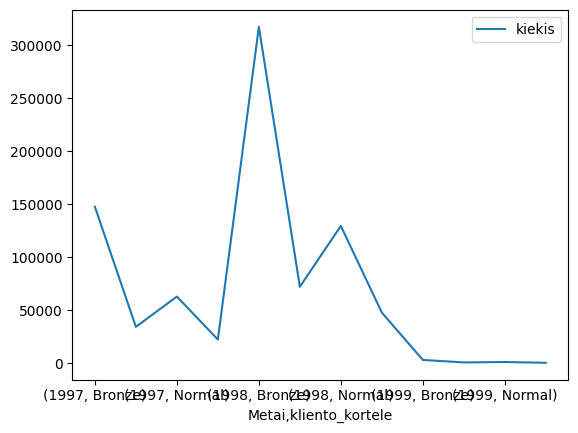

In [105]:
df_klientai_padavimai=df_klientai_padavimai[df_klientai_padavimai['Metai']>0]
df_klientai_padavimai[['kliento_kortele','kiekis', 'Metai']].groupby(['Metai','kliento_kortele']).sum().plot(subplots=True)

<Axes: xlabel='kliento_provincija'>

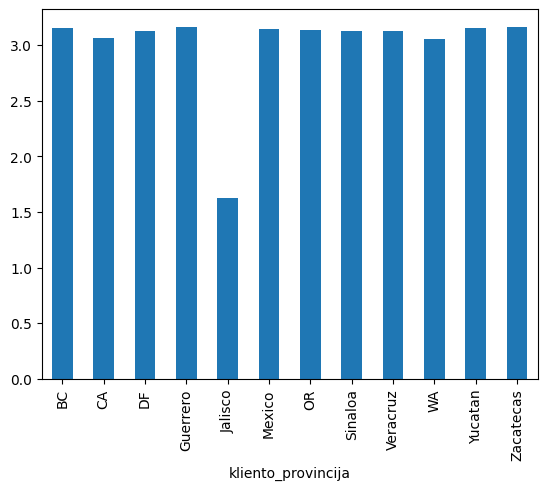

In [111]:
# Pagal miestus
df_klientai_padavimai[['kliento_provincija','kiekis']].groupby('kliento_provincija').mean().plot.bar(legend=False)